## Ensemble Learning

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
from scipy.stats import mode
from collections import defaultdict

In [3]:
data_wine = pd.read_csv("WineQT.csv")
data_housing = pd.read_csv("HousingData.csv")

In [1643]:
X_wine = data_wine.drop(columns=["quality", "Id"], axis=1)
y_wine = data_wine["quality"].values.reshape(-1, 1) 

categories = [np.arange(3, 9)]
encoder = OneHotEncoder(sparse_output=False, categories=categories)
y_encoded = encoder.fit_transform(y_wine)

X_train_wine, X_temp_wine, y_train_wine, y_temp_wine = train_test_split(X_wine, y_encoded, test_size=0.4, random_state=42, shuffle=True)
X_val_wine, X_test_wine, y_val_wine, y_test_wine = train_test_split(X_temp_wine, y_temp_wine, test_size=0.2, random_state=42, shuffle=True)

In [1644]:
### Convert the encoded y to normal flattened
y_train_wine_flat = np.argmax(y_train_wine, axis=1).tolist()
y_val_wine_flat = np.argmax(y_val_wine, axis=1).tolist()
y_test_wine_flat = np.argmax(y_val_wine, axis=1).tolist()

In [7]:
scaler = StandardScaler()
normalizer = MinMaxScaler()

In [1645]:
X_train_wine_standardized = scaler.fit_transform(X_train_wine)
X_val_wine_standardized = scaler.transform(X_val_wine)
X_test_wine_standardized = scaler.transform(X_test_wine)

X_train_wine_normalized = normalizer.fit_transform(X_train_wine_standardized)
X_val_wine_normalized = normalizer.transform(X_val_wine_standardized)
X_test_wine_normalized = normalizer.transform(X_test_wine_standardized)

In [10]:
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [11]:
null_values_wine = data_wine.isnull().sum()
print(null_values_wine)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [12]:
data_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [1747]:
null_values_housing = data_housing.isnull().sum()
print(null_values_housing)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [14]:
# Create an imputer object
imputer = SimpleImputer(strategy='mean')

data_housing[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']] = imputer.fit_transform(data_housing[['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']])

In [15]:
null_values_housing = data_housing.isnull().sum()
print(null_values_housing)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [1276]:
X_housing = data_housing.drop(columns=['MEDV'])
y_housing = data_housing['MEDV']

X_train_housing, X_temp_housing, y_train_housing, y_temp_housing = train_test_split(X_housing, y_housing, test_size=0.4, random_state=42)
X_val_housing, X_test_housing, y_val_housing, y_test_housing = train_test_split(X_temp_housing, y_temp_housing, test_size=0.5, random_state=42)

In [1748]:
X_train_housing_standardized = scaler.fit_transform(X_train_housing)
X_val_housing_standardized = scaler.transform(X_val_housing)
X_test_housing_standardized = scaler.transform(X_test_housing)

X_train_housing_normalized = normalizer.fit_transform(X_train_housing_standardized)
X_val_housing_normalized = normalizer.transform(X_val_housing_standardized)
X_test_housing_normalized = normalizer.transform(X_test_housing_standardized)

In [1274]:
# y_train_housing = y_train_housing.to_numpy().reshape(-1, 1).flatten()
# y_val_housing = y_val_housing.to_numpy().reshape(-1, 1).flatten()
# y_test_housing = y_test_housing.to_numpy().reshape(-1, 1).flatten()


In [1754]:
# y_train_house = y_train_housing.to_numpy()
y_train_house = y_train_housing.to_numpy().reshape(-1, 1)

# y_val_house = y_val_housing.to_numpy()
y_val_house = y_val_housing.to_numpy().reshape(-1, 1)

# y_test_house = y_test_housing.to_numpy()
y_test_house = y_test_housing.to_numpy().reshape(-1, 1)

In [1279]:
y_train_house_flat = y_train_house.flatten()
y_val_house_flat = y_val_house.flatten()
y_test_house_flat = y_test_house.flatten()

In [1755]:
num = X_train_housing_normalized.shape[1]
num

13

### Decision Tree

In [3093]:
class DecisionTree:
    def __init__(self, max_depth=5, max_features=5, criterion="gini"):
        self.model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion)
        
    def fit(self, X_train, y_train):
        y_train_send = np.argmax(y_train, axis=1)
        self.model.fit(X_train, y_train_send)
        
    def predict(self, X_test):
        proba = self.model.predict(X_test)
        return proba
    
    def predict_proba(self, X_test):
        proba = self.model.predict_proba(X_test)
        return proba

In [1676]:
class DecisionTreeSimple:
    def __init__(self, max_depth=5, max_features=5, criterion="gini"):
        self.model = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features, criterion=criterion)
        
    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        
    def predict(self, X_test):
        proba = self.model.predict(X_test)
        return np.argmax(proba, axis=1)

### Logistic Regression (Multinomial)

In [3045]:
class MultinomialLogisticRegression:
    def __init__(self, learning_rate=0.1, num_epochs=1000, log_flag=0):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.log_flag = log_flag

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        num_samples = y_true.shape[0]
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.sum(y_true * np.log(y_pred)) / num_samples
        return loss

    def gradient_descent(self, X, y, y_pred):
        num_samples = X.shape[0]
        grad = np.dot(X.T, (y_pred - y)) / num_samples
        return grad
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = y.shape[1]
    
        X = np.hstack((np.ones((num_samples, 1)), X))
        num_features += 1
    
        self.weights = np.zeros((num_features, num_classes))
        
        for epoch in range(self.num_epochs):
            indices = np.random.permutation(num_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(num_samples):
                xi = X_shuffled[i:i+1]
                yi = y_shuffled[i:i+1]
                z = np.dot(xi, self.weights)
                y_pred = self.softmax(z)
                gradient = self.gradient_descent(xi, yi, y_pred)
                self.weights -= self.learning_rate * gradient

    def predict_proba(self, X):
        num_samples = X.shape[0]
        X = np.hstack((np.ones((num_samples, 1)), X))
    
        z = np.dot(X, self.weights)
        return self.softmax(z)

    def predict(self, X):
        predictions = self.predict_proba(X)
        return np.argmax(predictions, axis=1)
    

### Decision Tree Regressor

In [1397]:
class DecisionRegressor:
    def __init__(self, max_depth=11, max_features=5, criterion="squared_error"):
        self.regressor = DecisionTreeRegressor(max_depth=max_depth, max_features=max_features, criterion=criterion)

    def fit(self, X, y):
        self.regressor.fit(X, y)

    def predict(self, X):
        return self.regressor.predict(X)

### Linear Regression (Multiclass)

In [3019]:
class LinearRegression:
    def __init__(self, learning_rate=0.5, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        self.weights = np.zeros((num_features, 1))
        self.bias = 0

        for _ in range(self.num_iterations):
            y_predicted = self.predict(X).reshape(-1, 1)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [3024]:
model = LinearRegression(learning_rate=0.5, num_iterations=1000)
model.fit(X_train_housing_normalized, y_train_house)
predictions = model.predict(X_val_housing_normalized)
error = mean_squared_error(y_val, predictions)
print(error)

18.832453855152004


In [3035]:
learning_rates = [0.1, 0.5, 0.01, 0.05, 0.001, 0.005]
num_iterations = [500, 1000, 2000, 5000, 10000]

best_lr = None
best_num_iter = None
best_error = float('inf')

for lr in learning_rates:
    for num_iter in num_iterations:
        model = LinearRegression(learning_rate=lr, num_iterations=num_iter)
        model.fit(X_train_housing_normalized, y_train_house)
        predictions = model.predict(X_val_housing_normalized)
        error = mean_squared_error(y_val_house_flat, predictions)
    
        if error < best_error:
            best_error = error
            best_lr = lr
            best_num_iter = num_iter

In [3036]:
print("Linear Regression")
print(f'Learning rate: {best_lr}, Number of iterations: {best_num_iter}')

Linear Regression
Learning rate: 0.5, Number of iterations: 10000


### Multi-Layer Perceptron Classification

In [1492]:
class MLP:
    def __init__(self, input_dim=11, hidden_layers = [5], output_dim=6, learning_rate=0.025, activation="relu"):
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.activation = activation
        self.weights = []
        self.biases = []
        self.__initialize_weights_and_biases()

    def __initialize_weights_and_biases(self):
        layers = [self.input_dim] + self.hidden_layers + [self.output_dim]
        for i in range(len(layers) - 1):
            # Use Xavier initialization for weights
            weight_scale = np.sqrt(2 / (layers[i] + layers[i + 1]))
            self.weights.append(np.random.randn(layers[i], layers[i + 1]) * weight_scale)
            # Initialize biases to zeros
            self.biases.append(np.zeros(layers[i + 1]))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def tanh(self, x):
        return np.tanh(x)
    
    def tanh_derivative(self, x): 
        return 1 - np.tanh(x)**2
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return np.where(x <= 0, 0, 1)

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def forward_propagation(self, X):
        self.a = [X]
        self.z = []
        for i in range(len(self.hidden_layers)):
            z = np.dot(self.a[-1], self.weights[i]) + self.biases[i]
            if self.activation == "relu":
                a = self.relu(z)
            elif self.activation == "sigmoid":
                a = self.sigmoid(z)
            elif self.activation == "tanh":
                 a = self.tanh(z)   
            self.z.append(z)
            self.a.append(a)
        z = np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]
        a = self.softmax(z)
        self.z.append(z)
        self.a.append(a)
        return a

    def back_propagation(self, X, y):
        m = X.shape[0]
        dz = [self.a[-1] - y]
        for i in range(len(self.hidden_layers), -1, -1):
            dw = 1/m * np.dot(self.a[i].T, dz[-1])
            db = 1/m * np.sum(dz[-1], axis=0)
            if i != 0:
                derivative = None
                if self.activation == "relu":
                    derivative = self.relu_derivative(self.a[i])
                elif self.activation == "sigmoid":
                    derivative = self.sigmoid_derivative(self.a[i])
                elif self.activation == "tanh":
                    derivative = self.tanh_derivative(self.a[i])   
                dz.append(np.dot(dz[-1], self.weights[i].T) * derivative)
            self.weights[i] -= self.learning_rate * dw
            self.biases[i] -= self.learning_rate * db

    def cross_entropy_loss(self, y_true, y_pred):
        epsilon = 1e-10
        num_samples = y_true.shape[0]
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.sum(y_true * np.log(y_pred)) / num_samples
        return loss

    def fit(self, X, y, epochs=1000, batch_size=32):
        indices = np.arange(X.shape[0])
        for epoch in range(epochs):
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                self.forward_propagation(X_batch)
                self.back_propagation(X_batch, y_batch)

    def predict_proba(self, X):
        y_pred = self.forward_propagation(X)
        return y_pred
    
    def predict(self, X):
        y_pred = self.predict_proba(X)
        return np.argmax(y_pred, axis=1)

In [185]:
# mlp = MLP(input_dim=11, hidden_layers=[5], output_dim=6, learning_rate=0.025, activation="relu")
# mlp.fit(X_train_wine_normalized, y_train_wine, X_val_wine_normalized, y_val_wine, epochs=1000)

### Multi-layer Perceptron Regression

In [1263]:
class MLPRegression:
    def __init__(self, input_dim=num, hidden_layers=[4], output_dim=1, learning_rate=0.001, activation="relu"):
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.activation = activation
        self.weights = []
        self.biases = []
        self.__initialize_weights_and_biases()

    def __initialize_weights_and_biases(self):
        layers = [self.input_dim] + self.hidden_layers + [self.output_dim]
        for i in range(len(layers) - 1):
            # Use Xavier initialization for weights
            weight_scale = np.sqrt(2 / (layers[i] + layers[i + 1]))
            self.weights.append(np.random.randn(layers[i], layers[i + 1]) * weight_scale)
            # Initialize biases to zeros
            self.biases.append(np.zeros(layers[i + 1]))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def tanh(self, x):
        return np.tanh(x)
    
    def tanh_derivative(self, x):
        return 1 - np.tanh(x)**2
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return np.where(x <= 0, 0, 1)

    def forward_propagation(self, X):
        self.a = [X]
        self.z = []
        for i in range(len(self.hidden_layers)):
            z = np.dot(self.a[-1], self.weights[i]) + self.biases[i]
            if self.activation == "relu":
                a = self.relu(z)
            elif self.activation == "sigmoid":
                a = self.sigmoid(z)
            elif self.activation == "tanh":
                 a = self.tanh(z)   
            self.z.append(z)
            self.a.append(a)
        z = np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]
        # No activation function for output layer in regression
        a = z
        self.z.append(z)
        self.a.append(a)
        return a

    def back_propagation(self, X, y):
        m = X.shape[0]
        dz = [self.a[-1] - y]
        for i in range(len(self.hidden_layers), -1, -1):
            dw = np.dot(self.a[i].T, dz[-1])
            db = np.sum(dz[-1], axis=0)
            if i != 0:
                derivative = None
                if self.activation == "relu":
                    derivative = self.relu_derivative(self.a[i])
                elif self.activation == "sigmoid":
                    derivative = self.sigmoid_derivative(self.a[i])
                elif self.activation == "tanh":
                    derivative = self.tanh_derivative(self.a[i])
                dz_next = np.dot(dz[-1], self.weights[i].T)
                dz.append(dz_next * derivative)
            self.weights[i] -= self.learning_rate * dw
            self.biases[i] -= self.learning_rate * db
        
    def fit(self, X_train, y_train, epochs=500, batch_size=32):
        train_losses = []
        val_losses = []
        indices = np.arange(X_train.shape[0])

        for epoch in range(epochs):
            np.random.shuffle(indices)
            X_train = X_train[indices]
            y_train = y_train[indices]

            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train[i:i+batch_size]
                y_batch = y_train[i:i+batch_size]
                self.forward_propagation(X_batch)
                self.back_propagation(X_batch, y_batch)
   
    def mean_squared_error(self, y_true, y_pred):
        num_samples = y_true.shape[0]
        mse_loss = np.sum((y_true - y_pred)**2) / num_samples
        return mse_loss

    def predict(self, X):
        y_pred = self.forward_propagation(X)
        return y_pred

### Bagging for Classification

In [3145]:
class Bagging:
    def __init__(self, base_estimator, n_estimators=10, fraction_samples=0.5, bootstrap=True, voting='hard'):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.fraction_samples = fraction_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.models = []

    def fit(self, X, y):
        self.num_classes = len(np.unique(y_train_wine_flat))
        classes = len(np.unique(y))
        
        self.models = []
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):        
            if self.fraction_samples == 1.0:
                sample_X, sample_y = X, y
            else:
                n_sub_samples = round(n_samples * self.fraction_samples)
                sss = StratifiedShuffleSplit(n_splits=1, train_size=n_sub_samples, test_size=n_samples - n_sub_samples, random_state=None)
                for train_index, _ in sss.split(X, y):
                    sample_X, sample_y = X[train_index], y[train_index]

                    for label in np.unique(y_train_wine):
                        if label not in sample_y:
                            label_indices = np.where(y == label)[0]
                            additional_index = np.random.choice(label_indices, size=1, replace=self.bootstrap)
                            sample_X = np.vstack((sample_X, X[additional_index]))
                            sample_y = np.append(sample_y, y[additional_index])
            
            model = self.base_estimator()
            model.fit(sample_X, sample_y)
            self.models.append(model)

    def predict(self, X):
        if self.voting == "hard":
            predictions = np.zeros(shape=(self.n_estimators, X.shape[0]), dtype=int)
            for i, model in enumerate(self.models):
                if isinstance(self.base_estimator, MultinomialLogisticRegression):
                    X = np.hstack((np.ones((X.shape[0], 1)), X))
                model_predictions = model.predict(X)
                predictions[i] = model_predictions
            result = mode(predictions, axis=0, keepdims=True)
            return result.mode[0]
        elif self.voting == "soft":
            probas = np.zeros(shape=(self.n_estimators, X.shape[0], self.num_classes))
            for i, model in enumerate(self.models):
                model_probas = model.predict_proba(X)
                probas[i] = model_probas
            avg_probas = np.mean(probas, axis=0)
            result = np.argmax(avg_probas, axis=1)
            return result


In [155]:
def add_bias_column(X):
    ones = np.ones((X.shape[0], 1))
    return np.hstack((ones, X))

In [3150]:
base_estimators = [DecisionTree, MultinomialLogisticRegression, MLP]

for i in range(len(base_estimators)):
    if i != 1:
        bagging_model = Bagging(base_estimator=base_estimators[i], n_estimators=20, fraction_samples=0.75, bootstrap=True, voting="soft")
        bagging_model.fit(X_train_wine_normalized, y_train_wine)
        y_pred = bagging_model.predict(X_val_wine_normalized)
    
        accuracy = accuracy_score(y_val_wine_flat, y_pred)
        print("Accuracy: ", accuracy)
    else:
        bagging_model = Bagging(base_estimator=base_estimators[i], n_estimators=5, fraction_samples=0.75, bootstrap=True, voting="soft")
        bagging_model.fit(X_train_wine_normalized, y_train_wine)
        y_pred = bagging_model.predict(X_val_wine_normalized)
    
        accuracy = accuracy_score(y_val_wine_flat, y_pred)
        print("Accuracy: ", accuracy)


Accuracy:  0.6284153005464481
Accuracy:  0.592896174863388
Accuracy:  0.6065573770491803


In [3179]:
base_estimators = [DecisionTree, MultinomialLogisticRegression, MLP]

#### Tuning

In [3154]:
top_accuracies = defaultdict(lambda: [(0, {})]*3)

for i in range(len(base_estimators)):
    for n_estimators in [5, 10, 50]:
        for fraction in [1.0, 0.75, 0.5, 0.25]:
            for bootstrap in [True, False]:
                for voting in ["hard", "soft"]:
                    if i != 1:
                        bagging_model = Bagging(base_estimator=base_estimators[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=True, voting=voting)
                        bagging_model.fit(X_train_wine_normalized, y_train_wine)
                        y_pred = bagging_model.predict(X_val_wine_normalized)
                        
                        accuracy = accuracy_score(y_val_wine_flat, y_pred)
                        print(accuracy)

                        if accuracy > min(top_accuracies[base_estimators[i]], key=lambda x:x[0])[0]:
                            top_accuracies[base_estimators[i]].remove(min(top_accuracies[base_estimators[i]], key=lambda x:x[0]))
                            top_accuracies[base_estimators[i]].append((accuracy, {'n_estimators': n_estimators, 'fraction_samples': fraction, 'bootstrap': bootstrap, 'voting': voting}))
                    else:
                        bagging_model = Bagging(base_estimator=base_estimators[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting)
                        bagging_model.fit(X_train_wine_normalized, y_train_wine)
                        y_pred = bagging_model.predict(X_val_wine_normalized)
                        
                        accuracy = accuracy_score(y_val_wine_flat, y_pred)

                        if accuracy > min(top_accuracies[base_estimators[i]], key=lambda x:x[0])[0]:
                            top_accuracies[base_estimators[i]].remove(min(top_accuracies[base_estimators[i]], key=lambda x:x[0]))
                            top_accuracies[base_estimators[i]].append((accuracy, {'n_estimators': n_estimators, 'fraction_samples': fraction, 'bootstrap': bootstrap, 'voting': voting}))


In [3187]:
top_accuracies = {}

for i in range(len(base_estimators)):
    top_accuracy = 0
    top_config = {}
    for n_estimators in [5, 10, 20, 50]:
        for fraction in [1.0, 0.75, 0.5, 0.25]:
            for bootstrap in [True, False]:
                for voting in ["hard", "soft"]:
                    if i != 1:
                        bagging_model = Bagging(base_estimator=base_estimators[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=True, voting=voting)
                        bagging_model.fit(X_train_wine_normalized, y_train_wine)
                        y_pred = bagging_model.predict(X_val_wine_normalized)
                        
                        accuracy = accuracy_score(y_val_wine_flat, y_pred)
                        if accuracy > top_accuracy:
                            top_accuracy = accuracy
                            top_config = {'n_estimators': n_estimators, 'fraction_samples': fraction, 'bootstrap': bootstrap, 'voting': voting}
                    else:
                        bagging_model = Bagging(base_estimator=base_estimators[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting)
                        bagging_model.fit(X_train_wine_normalized, y_train_wine)
                        y_pred = bagging_model.predict(X_val_wine_normalized)
                        accuracy = accuracy_score(y_val_wine_flat, y_pred)
                        if accuracy > top_accuracy:
                            top_accuracy = accuracy
                            top_config = {'n_estimators': n_estimators, 'fraction_samples': fraction, 'bootstrap': bootstrap, 'voting': voting}
                        
        top_accuracies[base_estimators[i]] = (top_accuracy, top_config)


In [3190]:
print(top_accuracies)

{<class '__main__.DecisionTree'>: (0.6092896174863388, {'n_estimators': 10, 'fraction_samples': 1.0, 'bootstrap': True, 'voting': 'soft'}), <class '__main__.MultinomialLogisticRegression'>: (0.6065573770491803, {'n_estimators': 1, 'fraction_samples': 0.75, 'bootstrap': False, 'voting': 'soft'}), <class '__main__.MLP'>: (0.6174863387978142, {'n_estimators': 5, 'fraction_samples': 0.75, 'bootstrap': True, 'voting': 'hard'})}


#### Note

0.15 fraction at times don't contain samples for the entire dataset (even after manually trying to be added). For equal distribution of classes SSS is used, prior to which as well, this low fraction don't always run properly as they don't represent the data properly.

#### Heatmap

In [3183]:
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_dict = {}

for i in range(len(base_estimators)):
    for n_estimators in [10]:
        for fraction in [0.5, 0.25]:
            if i != 1:
                bagging_model = Bagging(base_estimator=base_estimators[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=True, voting="hard")
                bagging_model.fit(X_train_wine_normalized, y_train_wine)
                y_pred = bagging_model.predict(X_val_wine_normalized)
                        
                accuracy = accuracy_score(y_val_wine_flat, y_pred)
                accuracy_dict[(i, n_estimators, fraction)] = accuracy
            else:
                bagging_model = Bagging(base_estimator=base_estimators[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=True, voting="hard")
                bagging_model.fit(X_train_wine_normalized, y_train_wine)
                y_pred = bagging_model.predict(X_val_wine_normalized)
                        
                accuracy = accuracy_score(y_val_wine_flat, y_pred)
                accuracy_dict[(i, n_estimators, fraction)] = accuracy


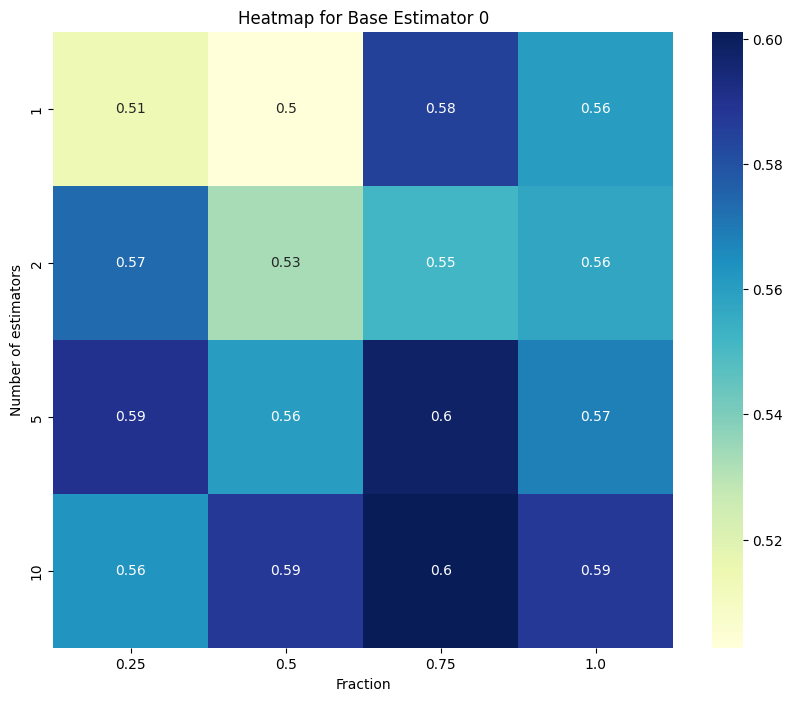

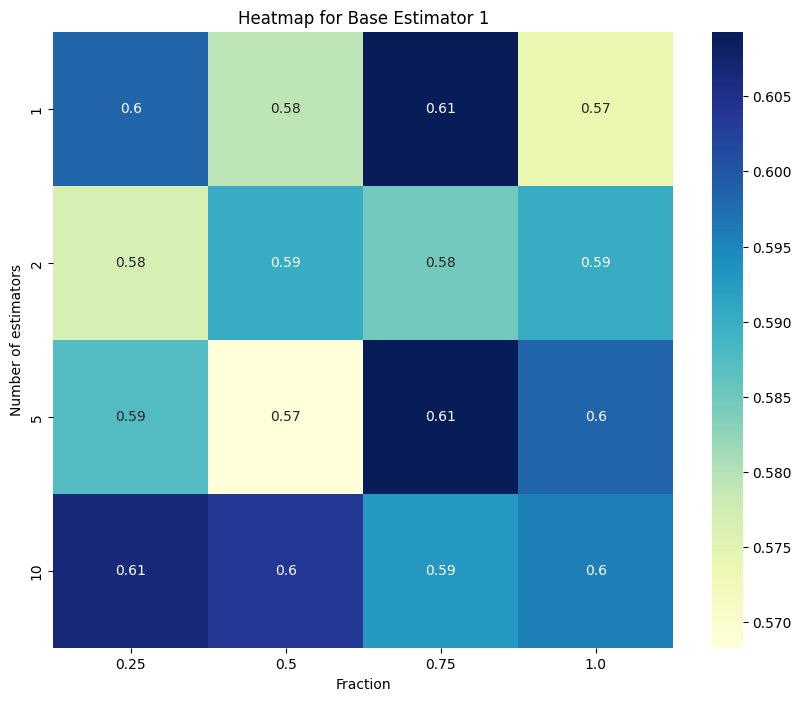

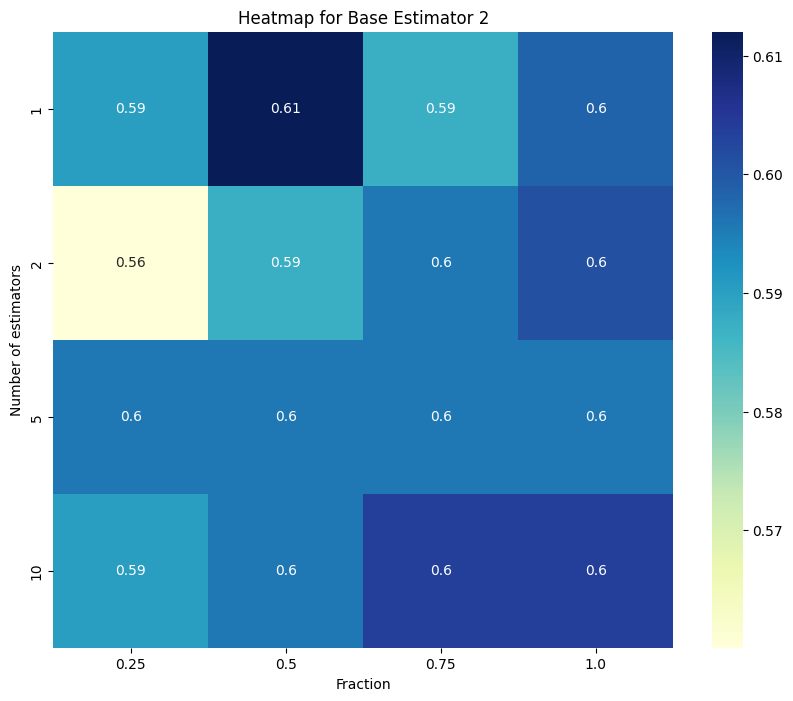

In [3198]:
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])

accuracy_df[['Base Estimator', 'Number of estimators', 'Fraction']] = pd.DataFrame(accuracy_df['Model'].tolist(), index=df.index)

# Group the data by the base estimator
grouped = accuracy_df.groupby('Base Estimator')

# For each group, create a pivot table and plot a heatmap
for name, group in grouped:
    pivot_df = group.pivot_table(index='Number of estimators', columns='Fraction', values='Accuracy')
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
    plt.title(f'Heatmap for Base Estimator {name}')
    plt.show()

In [3159]:
accuracy_list = []

dt = DecisionTree()
dt.fit(X_train_wine_normalized, y_train_wine)
y_pred = dt.predict(X_val_wine_normalized)

accuracy = accuracy_score(y_val_wine_flat, y_pred)
accuracy_list.append(accuracy)

dt = MultinomialLogisticRegression()
dt.fit(X_train_wine_normalized, y_train_wine)
y_pred = dt.fit(X_train_wine_normalized, y_train_wine)

accuracy = accuracy_score(y_val_wine_flat, y_pred)
accuracy_list.append(accuracy)

dt = MLP()
dt.fit(X_train_wine_normalized, y_train_wine)
y_pred = dt.predict(X_val_wine_normalized)

accuracy = accuracy_score(y_val_wine_flat, y_pred)
accuracy_list.append(accuracy)

In [3163]:
accuracy_ensemble = [v[0] for v in top_accuracies.values()]

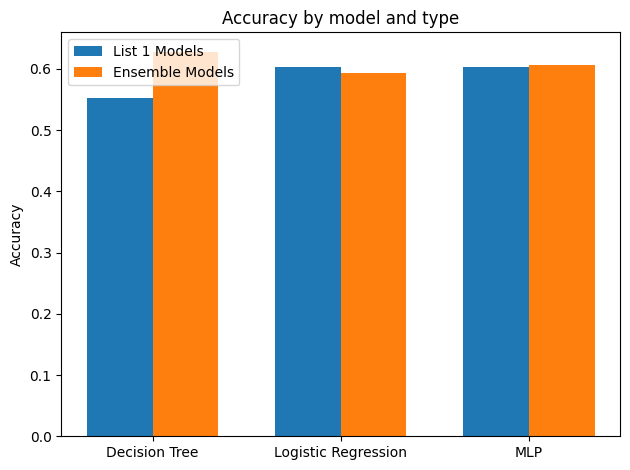

In [3162]:
labels = ['Decision Tree', 'Logistic Regression', 'MLP']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_list, width, label='List 1 Models')
rects2 = ax.bar(x + width/2, accuracy_ensemble, width, label='Ensemble Models')

ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by model and type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


### Bagging for Regression

In [1282]:
class BaggingRegressor:
    def __init__(self, base_estimator, n_estimators=10, fraction_samples=0.5, bootstrap=True, voting="hard"):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.fraction_samples = fraction_samples
        self.bootstrap = bootstrap
        self.voting = voting
        self.models = []

    def fit(self, X, y):
        self.models = []
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            sample_indices = np.random.choice(n_samples, size=int(self.fraction_samples * n_samples), replace=self.bootstrap)
            sample_X, sample_y = X[sample_indices], y[sample_indices]

            model = self.base_estimator()
            model.fit(sample_X, sample_y)
            self.models.append(model)

    def predict(self, X):
        if self.voting == "hard":
            predictions = np.zeros((self.n_estimators, X.shape[0]))
            for i, model in enumerate(self.models):
                predictions[i] = model.predict(X).flatten()
            return np.mean(predictions, axis=0)
        else:
            predictions = np.zeros((len(self.models), X.shape[0]))
        weights = np.zeros(len(self.models))
        for i, model in enumerate(self.models):
            predictions[i] = model.predict(X).flatten()
            # Assuming 'mean_squared_error' is a function that calculates MSE
            weights[i] = 1 / mean_squared_error(y_val_house_flat, model.predict(X_val_housing_normalized))
        return np.average(predictions, axis=0, weights=weights)

In [3034]:
base_estimators_regression = [DecisionRegressor, LinearRegression, MLPRegression]

for i in range(len(base_estimators_regression)):
    if i != 1:
        bagging_model = BaggingRegressor(base_estimator=base_estimators_regression[i], n_estimators=10, fraction_samples=1.0, bootstrap=True, voting="hard")
        bagging_model.fit(X_train_housing_normalized, y_train_house)
        y_pred = bagging_model.predict(X_test_housing_normalized)
    
        mse = mean_squared_error(y_test_house_flat, y_pred)
        print("MSE: ", mse)
    else:
        bagging_model = BaggingRegressor(base_estimator=base_estimators_regression[i], n_estimators=10, fraction_samples=1.0, bootstrap=True, voting="hard")
        bagging_model.fit(X_train_housing_normalized, y_train_house)
        y_pred = bagging_model.predict(X_test_housing_normalized)
    
        mse = mean_squared_error(y_test_house_flat, y_pred)
        print("MSE: ", mse)
        

MSE:  16.333051917806472
MSE:  24.668554549670137
MSE:  14.818417071090618


In [3166]:
least_mses = {}

for i in range(len(base_estimators_regression)):
    least_mse = 10000
    top_config = {}
    for n_estimators in [5, 10, 50]:
        for fraction in [1.0, 0.75, 0.5, 0.25]:
            for bootstrap in [True, False]:
                for voting in ["hard", "soft"]:
                    if i != 1:
                        bagging_model = BaggingRegressor(base_estimator=base_estimators_regression[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting)
                        bagging_model.fit(X_train_housing_normalized, y_train_house)
                        y_pred = bagging_model.predict(X_test_housing_normalized)
    
                        mse = mean_squared_error(y_test_house_flat, y_pred)

                        if mse < least_mse:
                            least_mse = mse
                            top_config = {'n_estimators': n_estimators, 'fraction_samples': fraction, 'bootstrap': bootstrap, 'voting': voting}
                    else:
                        bagging_model = BaggingRegressor(base_estimator=base_estimators_regression[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting)
                        bagging_model.fit(X_train_housing_normalized, y_train_house)
                        y_pred = bagging_model.predict(X_test_housing_normalized)
    
                        mse = mean_squared_error(y_test_house_flat, y_pred)
                        if mse < least_mse:
                            least_mse = mse
                            top_config = {'n_estimators': n_estimators, 'fraction_samples': fraction, 'bootstrap': bootstrap, 'voting': voting}
                        
        least_mses[base_estimators[i]] = (least_mse, top_config)


In [3172]:
print(least_mses)

{<class '__main__.DecisionRegressor'>: (8.666603393105392, {'n_estimators': 5, 'fraction_samples': 1.0, 'bootstrap': False, 'voting': 'hard'}), <class '__main__.LinearRegression'>: (24.17877442796049, {'n_estimators': 5, 'fraction_samples': 1.0, 'bootstrap': True, 'voting': 'soft'}), <class '__main__.MLPRegression'>: (13.146399851752065, {'n_estimators': 5, 'fraction_samples': 0.75, 'bootstrap': True, 'voting': 'hard'})}


In [3170]:
import seaborn as sns
import matplotlib.pyplot as plt

mse_dict = {}

for i in range(len(base_estimators)):
    for n_estimators in [5, 10, 20, 50]:
        for fraction in [1.0, 0.75, 0.5, 0.25]:
            if i != 1:
                bagging_model = BaggingRegressor(base_estimator=base_estimators_regression[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting)
                bagging_model.fit(X_train_housing_normalized, y_train_house)
                y_pred = bagging_model.predict(X_test_housing_normalized)
    
                mse = mean_squared_error(y_test_house_flat, y_pred)    
                mse_dict[(i, n_estimators, fraction)] = mse
            
            else:
                bagging_model = BaggingRegressor(base_estimator=base_estimators_regression[i], n_estimators=n_estimators, fraction_samples=fraction, bootstrap=bootstrap, voting=voting)
                bagging_model.fit(X_train_housing_normalized, y_train_house)
                y_pred = bagging_model.predict(X_test_housing_normalized)
                        
                mse = mean_squared_error(y_test_house_flat, y_pred)    
                mse_dict[(i, n_estimators, fraction)] = mse


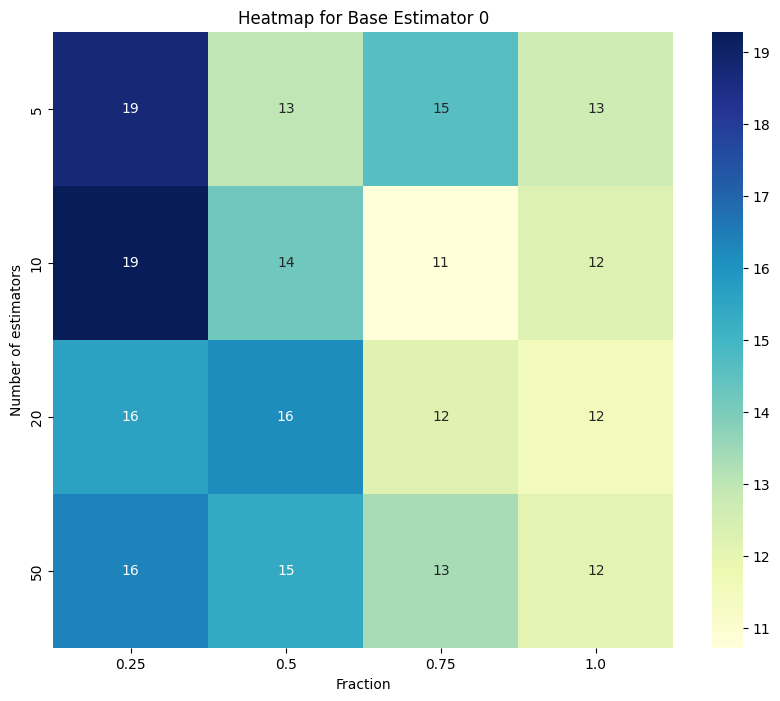

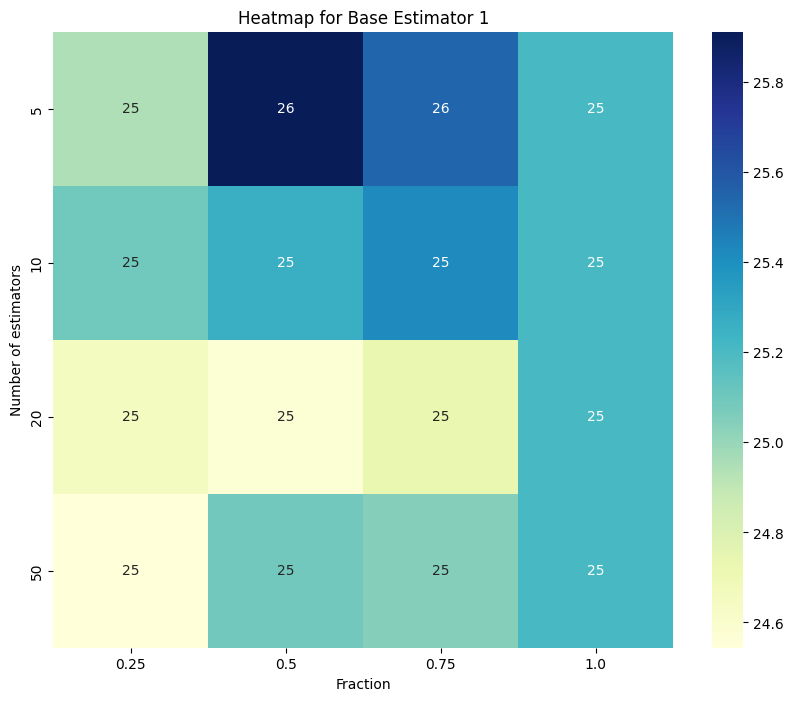

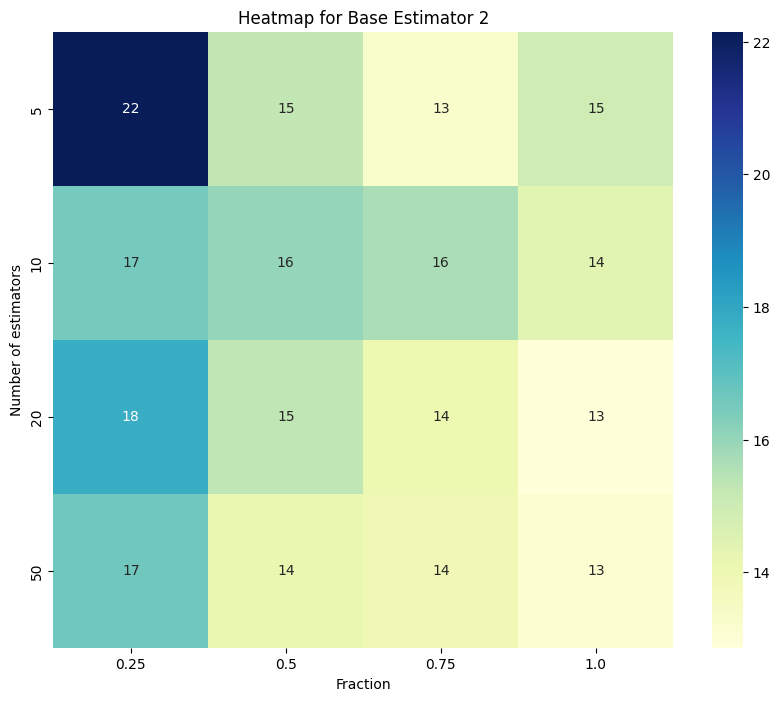

In [3177]:
df = pd.DataFrame(list(mse_dict.items()), columns=['Model', 'MSE'])

df[['Base Estimator', 'Number of estimators', 'Fraction']] = pd.DataFrame(df['Model'].tolist(), index=df.index)

# Group the data by the base estimator
grouped = df.groupby('Base Estimator')

# For each group, create a pivot table and plot a heatmap
for name, group in grouped:
    pivot_df = group.pivot_table(index='Number of estimators', columns='Fraction', values='MSE')
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
    plt.title(f'Heatmap for Base Estimator {name}')
    plt.show()


In [3199]:
mse_ensemble = [v[0] for v in least_mses.values()]

In [3200]:
mse_list = []

dt = DecisionTreeRegressor()
dt.fit(X_train_housing_normalized, y_train_house)
y_pred = dt.predict(X_test_housing_normalized)
mse = mean_squared_error(y_test_house_flat, y_pred)    

mse_list.append(mse)

dt = LinearRegression()
dt.fit(X_train_housing_normalized, y_train_house)
y_pred = dt.predict(X_test_housing_normalized)

mse = mean_squared_error(y_test_house_flat, y_pred)    
mse_list.append(mse)

dt = MLPRegression()
dt.fit(X_train_housing_normalized, y_train_house)
y_pred = dt.predict(X_test_housing_normalized)
mse = mean_squared_error(y_test_house_flat, y_pred)    

mse_list.append(mse)

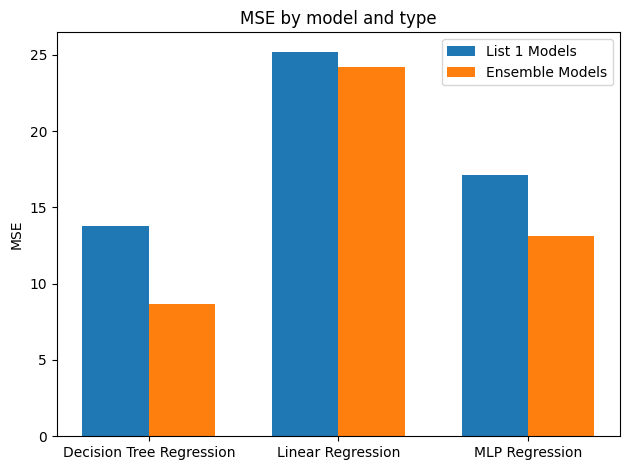

In [3201]:
labels = ['Decision Tree Regression', 'Linear Regression', 'MLP Regression']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_list, width, label='List 1 Models')
rects2 = ax.bar(x + width/2, mse_ensemble, width, label='Ensemble Models')

ax.set_ylabel('MSE')
ax.set_title('MSE by model and type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()


## Stacking and Blending

In [1730]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np

class StackingEnsemble:
    def __init__(self, base_estimators, final_estimator, methodology="Stacking"):
        self.base_estimators = base_estimators
        self.final_estimator = final_estimator
        self.methodology = methodology
        self.models = []

    def fit(self, X, y):
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

        if self.methodology == "Stacking":
            self.stacking_fit(X_train, y_train)
        elif self.methodology == "Blending":
            self.blending_fit(X_train, y_train, X_val, y_val)

        predictions = self.base_predictions(X_val)
        
        self.final_estimator = self.final_estimator()
        self.final_estimator.fit(predictions, y_val)

    def stacking_fit(self, X, y):
        kfold = KFold(n_splits=10)

        for train_index, val_index in kfold.split(X, y):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            for estimator_class in self.base_estimators:
                estimator = estimator_class()
                estimator.fit(X_train, y_train)
                self.models.append(estimator)

    def blending_fit(self, X_train, y_train, X_val, y_val):
        for estimator_class in self.base_estimators:
            estimator = estimator_class()
            estimator.fit(X_train, y_train)
            self.models.append(estimator)

    def predict(self, X):
        predictions = self.base_predictions(X)
        return self.final_estimator.predict(predictions)

    def base_predictions(self, X):
        predictions = []
        for i, model in enumerate(self.models):
            prediction = model.predict_proba(X) if hasattr(model, 'predict_proba') else model.predict(X)
            predictions.append(prediction)
        return np.column_stack(predictions)


#### Classification

In [1655]:
base_estimators = [DecisionTree, MultinomialLogisticRegression, MLP]
final_estimator = [DecisionTreeSimple, MultinomialLogisticRegression]

for estimator in final_estimator:
    ensemble = StackingEnsemble(base_estimators, estimator, methodology="Blending")
    ensemble.fit(X_train_wine_normalized, y_train_wine)
    y_pred = ensemble.predict(X_val_wine_normalized)
    
    accuracy = accuracy_score(y_pred, y_val_wine_flat)
    print("Accuracy: ", accuracy)

Accuracy:  0.5491803278688525
Accuracy:  0.5628415300546448


In [3202]:
print("Blending best performing model: ")
print("Meta Model Logistic Regression with accuracy: 0.5628415300546448")

Blending best performing model: 
Meta Model Logistic Regression with accuracy: 0.5628415300546448


In [3203]:
base_estimators = [DecisionTree, MultinomialLogisticRegression, MLP]
final_estimator = [DecisionTreeSimple, MultinomialLogisticRegression]

for estimator in final_estimator:
    ensemble = StackingEnsemble(base_estimators, estimator, methodology="Stacking")
    ensemble.fit(X_train_wine_normalized, y_train_wine)
    y_pred = ensemble.predict(X_val_wine_normalized)
    
    accuracy = accuracy_score(y_pred, y_val_wine_flat)
    print("Accuracy: ", accuracy)

Accuracy:  0.6637554585152838
Accuracy:  0.5807860262008734


In [3206]:
print("Stacking best performing model: ")
print("Meta Model Decision Tree with accuracy: 0.6655191256830601")

Stacking best performing model: 
Meta Model Decision Tree with accuracy: 0.6655191256830601


#### Regression

In [1813]:
base_estimators = [DecisionRegressor, LinearRegression, MLPRegression]
final_estimator = [DecisionRegressor, LinearRegression]

for estimator in final_estimator:
    ensemble = StackingEnsemble(base_estimators, estimator, methodology="Blending")
    ensemble.fit(X_train_housing_normalized, y_train_house)
    y_pred = ensemble.predict(X_val_housing_normalized)
    
    mse = mean_squared_error(y_val_house_flat, y_pred)
    print("MSE: ", mse)

MSE:  25.150792079207925
MSE:  14.797815564307717


In [3205]:
print("Blending best performing model: ")
print("Meta Model Linear Regression with MSE: 14.797815564307717")

Blending best performing model: 
Meta Model Linear Regression with MSE: 14.797815564307717


In [1810]:
base_estimators = [DecisionRegressor, LinearRegression, MLPRegression]
final_estimator = [DecisionRegressor, LinearRegression]

for estimator in final_estimator:
    ensemble = StackingEnsemble(base_estimators, estimator, methodology="Stacking")
    ensemble.fit(X_train_housing_normalized, y_train_house)
    y_pred = ensemble.predict(X_val_housing_normalized)
    
    mse = mean_squared_error(y_val_house_flat, y_pred)
    print("MSE: ", mse)

MSE:  20.443267326732673
MSE:  8.81834085883737


In [3207]:
print("Stacking best performing model: ")
print("Meta Model Linear Regression with MSE: 8.81834085883737")

Stacking best performing model: 
Meta Model Linear Regression with MSE: 8.81834085883737


In [3229]:
mse_bagging = []
training_time_bagging = []
from time import time

In [3230]:
start_time = time()
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor, n_estimators=5, fraction_samples=1.0, bootstrap=False, voting="hard")
bagging_model.fit(X_train_housing_normalized, y_train_house)
y_pred = bagging_model.predict(X_test_housing_normalized)
end_time = time()
    
mse = mean_squared_error(y_test_house_flat, y_pred)
mse_bagging.append(mse)
training_time_bagging.append(end_time - start_time)

In [3232]:
mse_stacking = []
training_time_stacking = []

In [3233]:
base_estimators = [DecisionRegressor, LinearRegression, MLPRegression]

start_time = time()
ensemble = StackingEnsemble(base_estimators, DecisionRegressor, methodology="Stacking")
ensemble.fit(X_train_housing_normalized, y_train_house)
y_pred = ensemble.predict(X_val_housing_normalized)
end_time = time()
    
mse = mean_squared_error(y_val_house_flat, y_pred)
mse_stacking.append(mse)
training_time_stacking.append(end_time - start_time)

In [3244]:
mse = []

mse.append(mse_bagging[0])
mse.append(mse_stacking[0])

In [3245]:
time = []

time.append(training_time_bagging[0])
time.append(training_time_stacking[0])

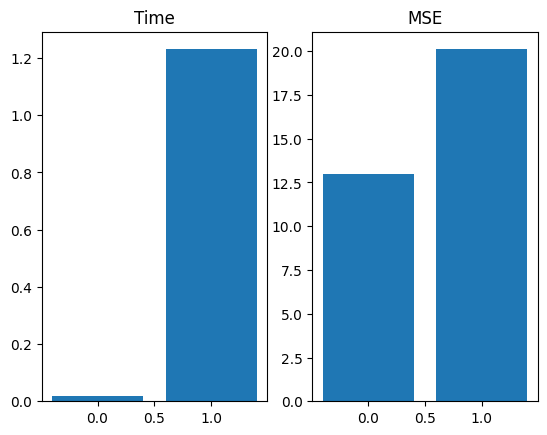

In [3246]:
# Create figure and axes
fig, axs = plt.subplots(1, 2)

# Create bar plot for time
axs[0].bar(np.arange(len(time)), time)
axs[0].set_title('Time')

# Create bar plot for mse
axs[1].bar(np.arange(len(mse)), mse)
axs[1].set_title('MSE')

# Display the plots
plt.show()


## Random Forest vs Boosted Trees

### Changing data for binary classification

In [2049]:
def map_labels(label):
    if label in [0, 1, 2]:
        return 0
    else:
        return 1

map_labels_vectorized = np.vectorize(map_labels)
y_train_binary = map_labels_vectorized(y_train_wine_flat)
y_val_binary = map_labels_vectorized(y_val_wine_flat)
y_test_binary = map_labels_vectorized(y_test_wine_flat)


In [2]:
class RandomForestClassifier:
    def __init__(self, bootstrap=True, n_estimators=20, max_depth=None, max_features=3):
        self.n_estimators = n_estimators
        self.bootstrap = bootstrap
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        num_features = X.shape[1]

        for _ in range(self.n_estimators):
            shuffle_indices = np.random.permutation(len(X))
            X_shuffled, y_shuffled = X[shuffle_indices], y[shuffle_indices]

            indices = np.random.choice(len(X_shuffled), len(X_shuffled), replace=self.bootstrap)
            X_subset, y_subset = X_shuffled[indices], y_shuffled[indices]

            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                max_features=self.max_features
            )
            tree.fit(X_subset, y_subset)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)


In [2260]:
random_forest = RandomForestClassifier(n_estimators=20, bootstrap=True)
random_forest.fit(X_train_wine_normalized, y_train_binary)

y_pred = random_forest.predict(X_val_wine_normalized)

In [2261]:
accuracy = accuracy_score(y_val_binary, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7650273224043715


In [3285]:
accuracy_list = []
time_acc = []

In [3286]:
for n_estimators in [5, 10, 20, 50, 100]:
    start_time = time()
    random_forest = RandomForestClassifier(n_estimators=num, bootstrap=bootstrap, max_depth=depth, max_features=features)
    random_forest.fit(X_train_wine_normalized, y_train_binary)
    y_pred = random_forest.predict(X_val_wine_normalized)
    accuracy = accuracy_score(y_val_binary, y_pred)
    end_time = time()
    accuracy_list.append(accuracy)
    time_acc.append(end_time - start_time)

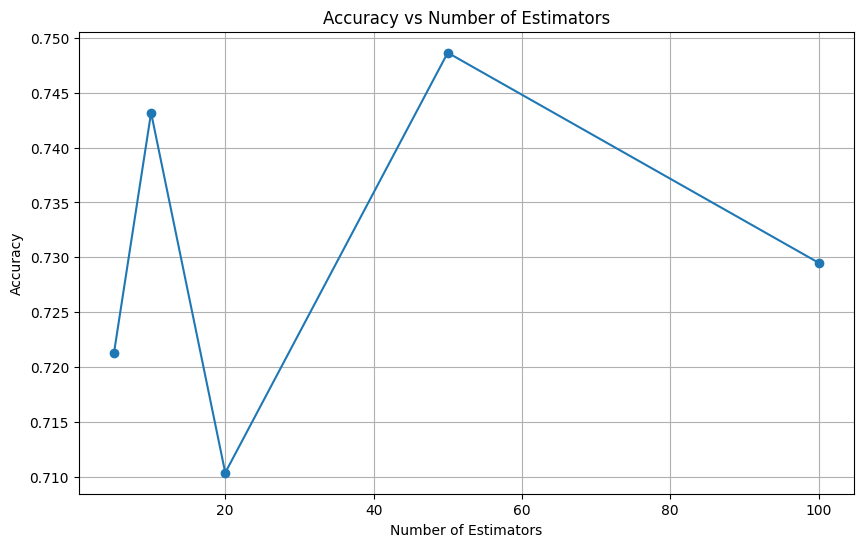

In [3287]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracy_list, marker='o')
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

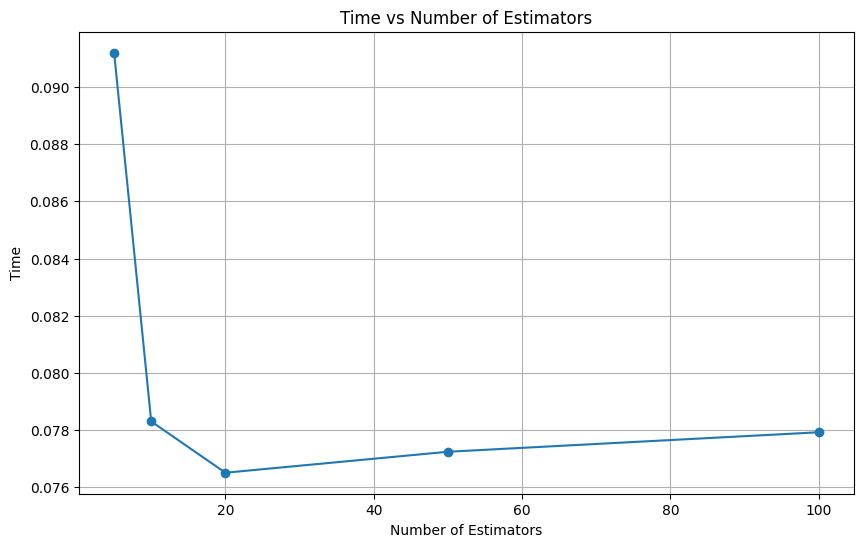

In [3288]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, time_acc, marker='o')
plt.title('Time vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Time')
plt.grid(True)
plt.show()

In [2252]:
best_accuracy = 0.0
best_params = {}

for num in [10, 20, 50, 75, 100]:
    for depth in [None, 1, 2, 3, 4, 5]:
        for features in [1, 2, 3, 4, 5]:
            for bootstrap in [True, False]:
                random_forest = RandomForestClassifier(n_estimators=num, bootstrap=bootstrap, max_depth=depth, max_features=features)
                random_forest.fit(X_train_wine_normalized, y_train_binary)
                y_pred = random_forest.predict(X_val_wine_normalized)
                accuracy = accuracy_score(y_val_binary, y_pred)
                                
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {'n_estimators': num, 'max_depth': depth, 'max_features': features, 'bootstrap': bootstrap}

In [2253]:
print("Accuracy: ", best_accuracy)
print("Parameters: ", best_params)

Accuracy:  0.7814207650273224
Parameters:  {'n_estimators': 20, 'max_depth': None, 'max_features': 3, 'bootstrap': True}


In [4]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, max_features=5, bootstrap=True):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        X, y = np.array(X), np.array(y)
        num_features = X.shape[1]

        for _ in range(self.n_estimators):
            shuffle_indices = np.random.permutation(len(X))
            X_shuffled, y_shuffled = X[shuffle_indices], y[shuffle_indices]

            indices = np.random.choice(len(X_shuffled), len(X_shuffled), replace=self.bootstrap)
            X_subset, y_subset = X_shuffled[indices], y_shuffled[indices]

            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                max_features=self.max_features
            )
            tree.fit(X_subset, y_subset)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros(len(X))

        for tree in self.trees:
            predictions += tree.predict(X)
    
        return predictions / self.n_estimators


In [3247]:
rf = RandomForestRegressor(n_estimators=50, bootstrap=True)
rf.fit(X_train_housing_normalized, y_train_house)

predictions = rf.predict(X_test_housing_normalized)

In [2315]:
mse = mean_squared_error(y_test_house_flat, predictions)
print("MSE: ", mse)    

MSE:  10.829899333333334


In [3275]:
mse_rf = []
time_mse = []

In [3277]:
from time import time

In [3278]:
for n_estimators in [5, 10, 20, 50, 100]:
    start_time = time()
    rf = RandomForestRegressor(n_estimators=n_estimators, bootstrap=True)
    rf.fit(X_train_housing_normalized, y_train_house)
    predictions = rf.predict(X_test_housing_normalized)
    
    mse = mean_squared_error(y_test_house_flat, predictions)
    end_time = time()
    mse_rf.append(mse)
    time_mse.append(end_time - start_time)

In [3257]:
n_estimators_list = [5, 10, 20, 50, 100]

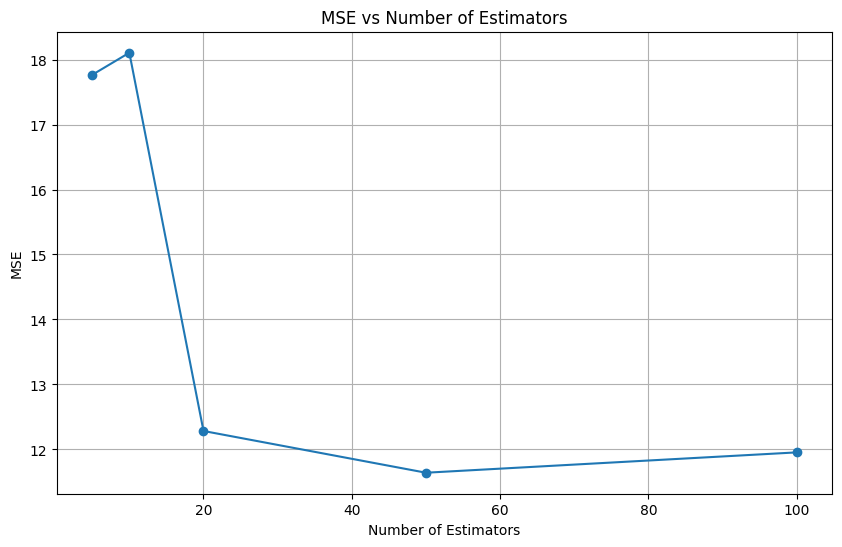

In [3261]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_rf, marker='o')
plt.title('MSE vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

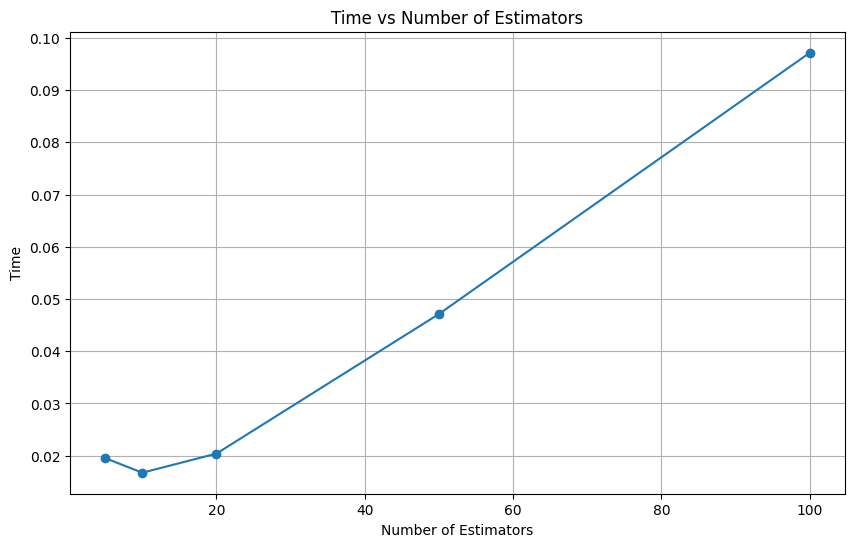

In [3279]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, time_mse, marker='o')
plt.title('Time vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Time')
plt.grid(True)
plt.show()

In [3264]:
import sys
low_mse = 10000
best_params_reg = {}

for num in [10, 20, 50, 75, 100]:
    for depth in [None, 1, 2, 3, 4, 5]:
        for features in [1, 2, 3, 4, 5]:
            for bootstrap in [True, False]:
                random_forest = RandomForestRegressor(n_estimators=num, bootstrap=bootstrap, max_depth=depth, max_features=features)
                random_forest.fit(X_train_housing_normalized, y_train_house)
                y_pred = random_forest.predict(X_val_housing_normalized)
                mse = mean_squared_error(y_val_house_flat, y_pred)
                                
                if mse < low_mse:
                    low_mse = mse
                    best_params_reg = {'n_estimators': num, 'max_depth': depth, 'max_features': features, 'bootstrap': bootstrap}

In [2288]:
best_params_reg

{'n_estimators': 10, 'max_depth': None, 'max_features': 5, 'bootstrap': True}

In [2289]:
low_mse

8.46933861386139

## AdaBoost

In [5]:
# Used ChatGPT and Bing
class AdaBoost:
    def fit(self, X_train, y_train, T, eta=1.0, stub_depth = 1):
        self.y_train = 2*y_train - 1
        self.X_train = X_train
        self.N, self.D = X_train.shape
        self.T = T
        self.eta = eta
        self.stub_depth = stub_depth
        
        self.weights = np.repeat(1/self.N, self.N)
        self.trees = []
        self.alphas = []
        self.yhats = np.empty((self.N, self.T))
        
        for t in range(self.T):            
            self.T_t = DecisionTreeClassifier(max_depth = self.stub_depth)
            self.T_t.fit(self.X_train, self.y_train, self.weights)
            self.yhat_t = self.T_t.predict(self.X_train)
            self.epsilon_t = sum(self.weights*(self.yhat_t != self.y_train))/sum(self.weights)
            self.alpha_t = self.eta * np.log( (1-self.epsilon_t)/self.epsilon_t )
            self.weights = np.array([w*np.exp(-self.alpha_t*self.y_train[i]*self.yhat_t[i]) for i, w in enumerate(self.weights)])
            self.weights /= np.sum(self.weights)
            
            self.trees.append(self.T_t)
            self.alphas.append(self.alpha_t)
            self.yhats[:,t] = self.yhat_t 
            
        self.yhat = np.sign(np.dot(self.yhats, self.alphas))
        
    def predict(self, X_test):
        yhats = np.zeros(len(X_test))
        for t, tree in enumerate(self.trees):
            yhats_tree = tree.predict(X_test)
            yhats += yhats_tree*self.alphas[t]
        return (np.sign(yhats) + 1) / 2


In [2623]:
ada_boost_model = AdaBoost()
ada_boost_model.fit(X_train_wine_normalized, y_train_binary, T=100, eta=0.1)

y_pred_test = ada_boost_model.predict(X_val_wine_normalized)

print("Accuracy:", accuracy_score(y_val_binary, y_pred_test))


Accuracy: 0.773224043715847


In [3321]:
accuracy_ada = []
time_ada = []

In [3322]:
for n_estimators in [5, 10, 20, 50, 100]:
    start_time = time()
    rf = AdaBoost()
    rf.fit(X_train_wine_normalized, y_train_binary, T=n_estimators, eta=0.1)
    y_pred_test = ada_boost_model.predict(X_val_wine_normalized)
    
    accuracy = accuracy_score(y_val_binary, y_pred_test)
    end_time = time()
    accuracy_ada.append(accuracy)
    time_ada.append(end_time - start_time)

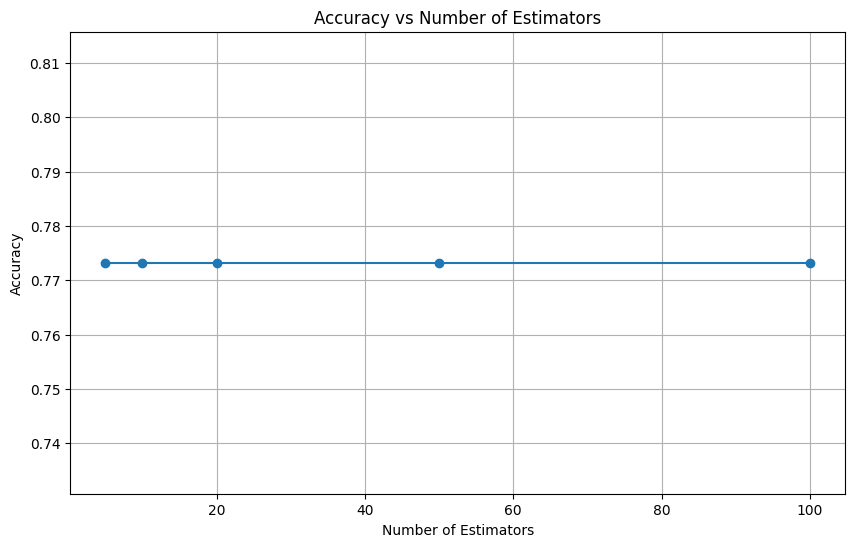

In [3323]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracy_ada, marker='o')
plt.title('Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

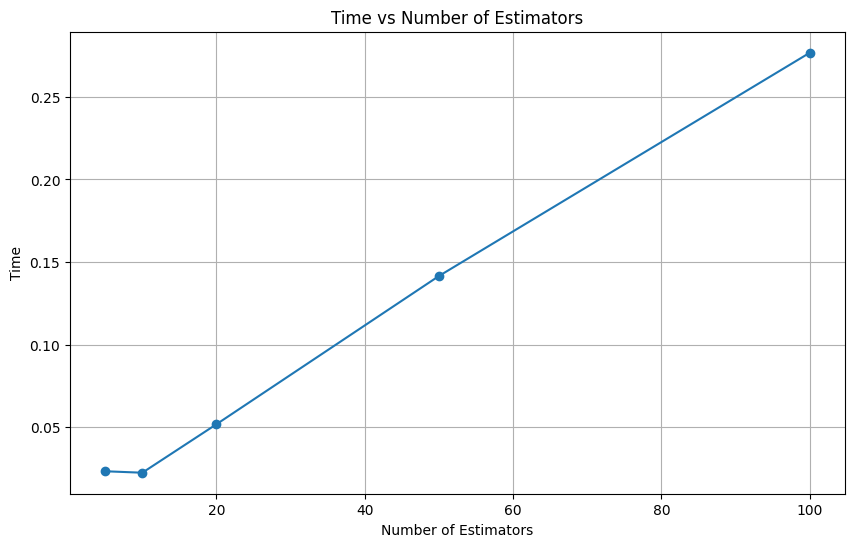

In [3324]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, time_ada, marker='o')
plt.title('Time vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Time')
plt.grid(True)
plt.show()

In [2625]:
for S in [1, 5, 10, 15, 20, 50, 100, 200, 500, 1000]:
    for eta in [1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
        abc = AdaBoost()
        abc.fit(X_train_wine_normalized, y_train_binary, T=S, eta=eta)
        y_pred = abc.predict(X_val_wine_normalized)

        # Model Accuracy
        print("Accuracy:", accuracy_score(y_val_binary, y_pred))

Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.7377049180327869
Accuracy: 0.7213114754098361
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.3224043715846995
Accuracy: 0.7377049180327869
Accuracy: 0.7404371584699454
Accuracy: 0.7213114754098361
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.7240437158469946
Accuracy: 0.7377049180327869
Accuracy: 0.7240437158469946
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.3224043715846995
Accuracy: 0.7377049180327869
Accuracy: 0.7377049180327869
Accuracy: 0.7213114754098361
Accuracy: 0.6775956284153005
Accuracy: 0.6775956284153005
Accuracy: 0.67

In [3273]:
print("Best Model: number of estimators = 100, learning rate = 0.1")

Best Model: number of estimators = 100, learning rate = 0.1


In [8]:
# Used ChatGPT and Bing
class AdaBoostRegressor():
    def __init__(self, learning_rate=1.0, n_iter=50):
        self.trees = []
        self.alphas = []
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def weighted_median(self, values, weights):
        sorted_indices = values.argsort()
        weights = np.array(weights)
        values = values[sorted_indices]
        weights = weights[sorted_indices]
        weights_cumulative_sum = weights.cumsum()
        median_weight = np.argmax(weights_cumulative_sum >= sum(weights)/2)
        return values[median_weight]
    
    def fit(self, X_train, y_train):
        n_samples = X_train.shape[0]
        weights = np.ones(n_samples) / n_samples

        for t in range(self.n_iter):
            idx = np.random.choice(n_samples, n_samples, replace=True, p=weights)
            X_boot, y_boot = X_train[idx], y_train[idx]
            tree = DecisionTreeRegressor()
            tree.fit(X_boot, y_boot)

            y_hat = tree.predict(X_train)
            error = np.abs(y_hat - y_train)
            error = error / np.max(error)

            weighted_error = np.sum(weights * error)
            if(weighted_error >= 0.5):
                self.n_iter = t - 1
                break

            self.trees.append(tree)
            beta_t = weighted_error / (1 - weighted_error)
            weights *= (beta_t) ** (1 - error)
            weights /= np.sum(weights)

            self.alphas.append(self.learning_rate * np.log(1 / beta_t))
        
        return
    
    def predict(self, X_test):
        n_samples = X_test.shape[0]
        fitted_values = np.empty((n_samples, self.n_iter))

        for t, tree in enumerate(self.trees):
            fitted_values[:, t] = tree.predict(X_test)
        return np.array([self.weighted_median(fitted_values[n], self.alphas) for n in range(n_samples)])


In [3330]:
regressor = AdaBoostRegressor(learning_rate=0.001, n_iter=50)
regressor.fit(X_train_housing_normalized, y_train_house_flat)
predictions = regressor.predict(X_test_housing_normalized)

mse = mean_squared_error(y_test_house_flat, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 7.543921568627449


In [3340]:
mse_ada = []
time_ada = []

In [3341]:
for n_estimators in [5, 10, 20, 50, 100]:
    start_time = time()
    regressor = AdaBoostRegressor(learning_rate=0.001, n_iter=n_estimators)
    regressor.fit(X_train_housing_normalized, y_train_house_flat)
    predictions = regressor.predict(X_test_housing_normalized)

    mse = mean_squared_error(y_test_house_flat, predictions)
    end_time = time()
    mse_ada.append(mse)
    time_ada.append(end_time - start_time)

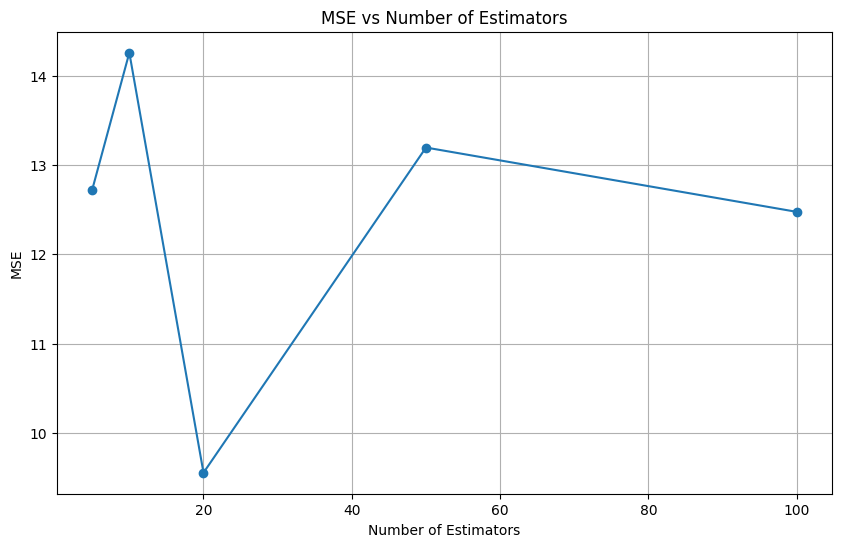

In [3349]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, mse_ada, marker='o')
plt.title('MSE vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

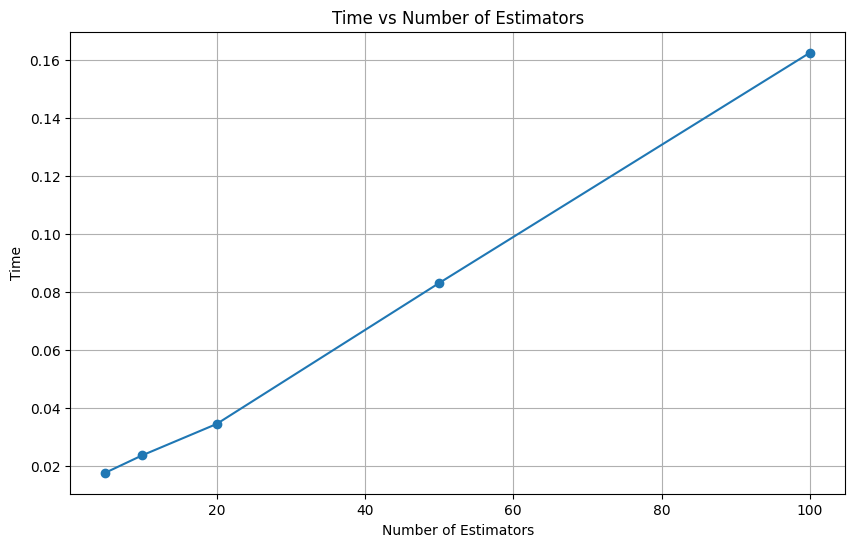

In [3350]:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, time_ada, marker='o')
plt.title('Time vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Time')
plt.grid(True)
plt.show()

In [2893]:
for n_iter in [1, 5, 10, 15, 20, 50, 75, 100, 150, 200]:
    for eta in [1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
        abc = AdaBoostRegressor(learning_rate=eta, n_iter=n_iter)
        abc.fit(X_train_housing_normalized, y_train_house_flat)
        y_pred = abc.predict(X_test_housing_normalized)

        mse = mean_squared_error(y_test_house_flat, y_pred)
        print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13.406764705882352
Mean Squared Error: 16.36627450980392
Mean Squared Error: 19.77941176470588
Mean Squared Error: 30.023627450980385
Mean Squared Error: 27.646078431372544
Mean Squared Error: 46.25411764705883
Mean Squared Error: 17.538039215686272
Mean Squared Error: 11.653529411764705
Mean Squared Error: 9.407647058823526
Mean Squared Error: 10.944117647058825
Mean Squared Error: 9.563627450980395
Mean Squared Error: 13.949509803921568
Mean Squared Error: 15.710196078431375
Mean Squared Error: 16.454019607843136
Mean Squared Error: 13.741666666666667
Mean Squared Error: 16.37107843137255
Mean Squared Error: 14.511176470588234
Mean Squared Error: 9.441274509803923
Mean Squared Error: 14.043725490196081
Mean Squared Error: 15.78529411764706
Mean Squared Error: 7.992450980392156
Mean Squared Error: 14.238137254901964
Mean Squared Error: 13.787254901960779
Mean Squared Error: 8.783627450980394
Mean Squared Error: 8.151666666666666
Mean Squared Error: 12.9804901960784

In [3274]:
print("Best Model learning_rate=0.001, number of estimators=50")

Best Model learning_rate=0.001, number of estimators=50


### Gradient Boosting Decision Trees

In [11]:
# Used ChatGPT and Bing

class GradientBoostedTree:
    def __init__(self, n_trees, learning_rate):
        self.n_trees = n_trees
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        # Step 1: Calculate the mean score
        y_pred = np.full(np.shape(y), np.mean(y))
        for _ in range(self.n_trees):
            
            # Step 2: Calculate the residuals
            residual = y - y_pred
            
            # Step 3: Build a decision tree to predict the residuals
            tree = DecisionTreeRegressor(max_depth=2)
            tree.fit(X, residual)
            self.trees.append(tree)
            
            # Step 4: Generate a new set of predictions
            update = tree.predict(X)
            
            # Step 5: Update the prediction with the learning rate
            y_pred += self.learning_rate * update

    def predict(self, X):
        y_pred = np.full((np.shape(X)[0],), np.mean(y))
        for tree in self.trees:
            update = tree.predict(X)
            y_pred += self.learning_rate * update
        return y_pred



In [2805]:
model = GradientBoostedTree(n_trees=75, learning_rate=0.5)
model.fit(X_train_housing_normalized, y_train_house_flat)

# Make predictions
y_pred = model.predict(X_val_housing_normalized)

# Evaluate the model
mse = mean_squared_error(y_val_house_flat, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 9.032376223464228


In [2804]:
for n_trees in [1, 2, 3, 5, 10, 15, 20, 30, 50, 75, 100, 200]:
    for learning_rate in [0.1, 0.5, 0.01, 0.05, 0.001, 0.005]:
        model = GradientBoostedTree(n_trees=n_trees, learning_rate=learning_rate)
        model.fit(X_train_housing_normalized, y_train_house_flat)

        # Make predictions
        y_pred = model.predict(X_val_housing_normalized)

        # Evaluate the model
        print(n_trees, learning_rate)
        mse = mean_squared_error(y_val_house_flat, y_pred)
        print(f"Mean Squared Error: {mse}")

1 0.1
Mean Squared Error: 59.428326668902564
1 0.5
Mean Squared Error: 37.29282229230262
1 0.01
Mean Squared Error: 66.38013954336769
1 0.05
Mean Squared Error: 63.201042465839876
1 0.001
Mean Squared Error: 67.11514962970875
1 0.005
Mean Squared Error: 66.78758445555728
2 0.1
Mean Squared Error: 53.200673774338284
2 0.5
Mean Squared Error: 22.69328131089712
2 0.01
Mean Squared Error: 65.57999249616037
2 0.05
Mean Squared Error: 59.611654187291805
2 0.001
Mean Squared Error: 67.03320621321161
2 0.005
Mean Squared Error: 66.38217120821272
3 0.1
Mean Squared Error: 48.04340951105352
3 0.5
Mean Squared Error: 16.854403499107747
3 0.01
Mean Squared Error: 64.79647825826235
3 0.05
Mean Squared Error: 56.38857320730026
3 0.001
Mean Squared Error: 66.95143383009106
3 0.005
Mean Squared Error: 65.98098122593879
5 0.1
Mean Squared Error: 40.3934016300551
5 0.5
Mean Squared Error: 12.99133490932849
5 0.01
Mean Squared Error: 63.27800264246432
5 0.05
Mean Squared Error: 50.806558644440315
5 0.001

In [3353]:
import matplotlib.pyplot as plt

# Initialize lists to store MSE for each number of trees
mse_list = []
time_list = []
n_trees_list = [1, 2, 3, 5, 10, 15, 20, 30, 50, 75, 100, 200]

for n_trees in n_trees_list:
    start_time = time()
    model = GradientBoostedTree(n_trees=n_trees, learning_rate=0.5)
    model.fit(X_train_housing_normalized, y_train_house_flat)

    # Make predictions
    y_pred = model.predict(X_val_housing_normalized)
    end_time = time()

    # Evaluate the model
    mse = mean_squared_error(y_val_house_flat, y_pred)
    mse_list.append(mse)
    time_list.append(end_time - start_time)


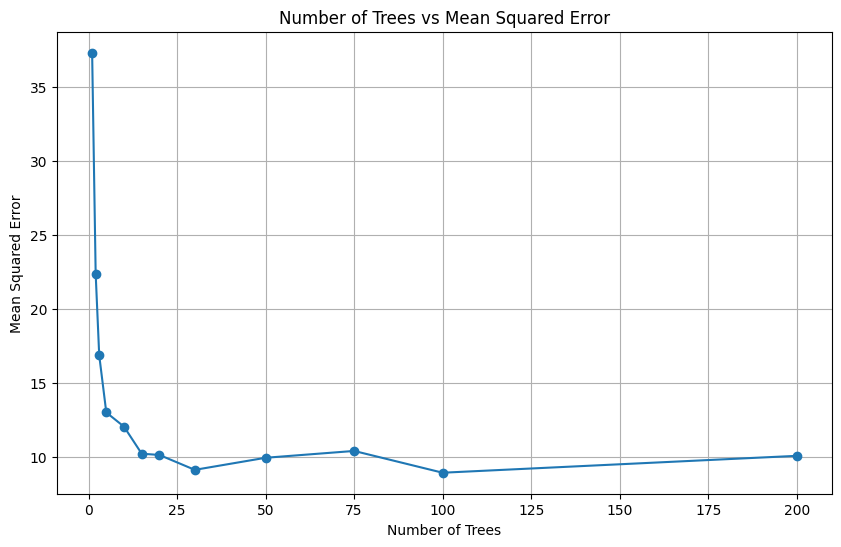

In [3354]:
# Plot number of trees vs MSE
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, mse_list, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.title('Number of Trees vs Mean Squared Error')
plt.grid(True)
plt.show()


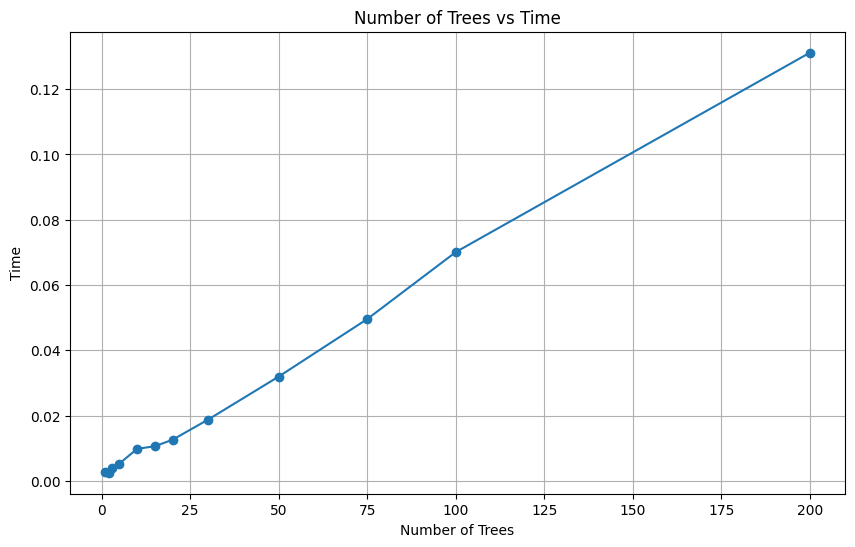

In [3355]:
# Plot number of trees vs MSE
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, time_list, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Time')
plt.title('Number of Trees vs Time')
plt.grid(True)
plt.show()

In [13]:
# Used ChatGPT and Bing
from sklearn.tree import DecisionTreeRegressor
import numpy as np

class GradientBoostingClassifier:
    def __init__(self, num_trees=10, learning_rate=0.1):
        self.num_trees = num_trees
        self.learning_rate = learning_rate
        self.trees = []

    def fit(self, X, y):
        # Calculate the log odds of the target variable
        num_pos = np.sum(y == 1)
        num_neg = np.sum(y == 0)
        log_odds = np.log(num_pos / num_neg)

        # Calculate the initial predictions
        preds = np.exp(log_odds) / (1 + np.exp(log_odds))

        for _ in range(self.num_trees):
            residuals = y - preds
            tree = DecisionTreeRegressor(max_depth=5)
            tree.fit(X, residuals)
            self.trees.append(tree)

            tree_preds = tree.predict(X)
            preds += self.learning_rate * tree_preds

    def predict(self, X):
        preds = sum(tree.predict(X) for tree in self.trees)
        return (preds >= 0.5).astype(int)


In [2951]:
clf = GradientBoostingClassifier(num_trees=200, learning_rate=0.01)

# Fit the classifier
clf.fit(X_train_wine_normalized, y_train_binary)

# Make predictions
y_pred = clf.predict(X_val_wine_normalized)

# Calculate accuracy
accuracy = accuracy_score(y_val_binary, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7704918032786885


In [2944]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
clf_tree = DecisionTreeClassifier()

# Fit the classifier
clf_tree.fit(X_train_wine_normalized, y_train_binary)

# Make predictions
y_pred_tree = clf_tree.predict(X_val_wine_normalized)

# Calculate accuracy
accuracy_tree = accuracy_score(y_val_binary, y_pred_tree)
print(f'Accuracy: {accuracy_tree}')

Accuracy: 0.6939890710382514


In [2945]:
for S in [5, 10, 15, 20, 50, 100, 200, 500, 1000]:
    for eta in [1.0, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001]:
        clf = GradientBoostingClassifier(num_trees=S, learning_rate=eta)
        clf.fit(X_train_wine_normalized, y_train_binary)
        y_pred = clf.predict(X_val_wine_normalized)

        # Model Accuracy
        print(S, eta)
        print("Accuracy:", accuracy_score(y_val_binary, y_pred))

5 1.0
Accuracy: 0.4972677595628415
5 0.5
Accuracy: 0.6639344262295082
5 0.1
Accuracy: 0.6857923497267759
5 0.05
Accuracy: 0.6612021857923497
5 0.01
Accuracy: 0.6693989071038251
5 0.005
Accuracy: 0.6693989071038251
5 0.001
Accuracy: 0.674863387978142
10 1.0
Accuracy: 0.5382513661202186
10 0.5
Accuracy: 0.6885245901639344
10 0.1
Accuracy: 0.7240437158469946
10 0.05
Accuracy: 0.7076502732240437
10 0.01
Accuracy: 0.6857923497267759
10 0.005
Accuracy: 0.6912568306010929
10 0.001
Accuracy: 0.6912568306010929
15 1.0
Accuracy: 0.5491803278688525
15 0.5
Accuracy: 0.680327868852459
15 0.1
Accuracy: 0.7377049180327869
15 0.05
Accuracy: 0.726775956284153
15 0.01
Accuracy: 0.6939890710382514
15 0.005
Accuracy: 0.7349726775956285
15 0.001
Accuracy: 0.7349726775956285
20 1.0
Accuracy: 0.48633879781420764
20 0.5
Accuracy: 0.7158469945355191
20 0.1
Accuracy: 0.7459016393442623
20 0.05
Accuracy: 0.7377049180327869
20 0.01
Accuracy: 0.7185792349726776
20 0.005
Accuracy: 0.6994535519125683
20 0.001
Accura

In [3356]:
import matplotlib.pyplot as plt

# Initialize lists to store MSE for each number of trees
accuracy_list = []
time_list = []
n_trees_list = [2, 3, 5, 10, 15, 20, 30, 50, 75, 100, 200]

for n_trees in n_trees_list:
    start_time = time()
    clf = GradientBoostingClassifier(num_trees=n_trees, learning_rate=0.01)
    clf.fit(X_train_wine_normalized, y_train_binary)
    y_pred = clf.predict(X_val_wine_normalized)
    end_time = time()

    # Evaluate the model
    accuracy = accuracy_score(y_val_binary, y_pred)
    accuracy_list.append(accuracy)
    time_list.append(end_time-start_time)

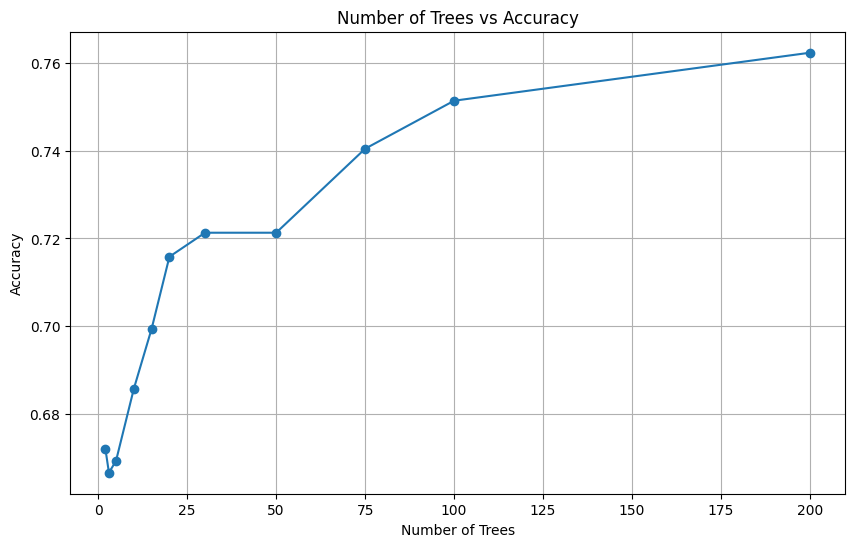

In [3357]:
# Plot number of trees vs MSE
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, accuracy_list, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Number of Trees vs Accuracy')
plt.grid(True)
plt.show()


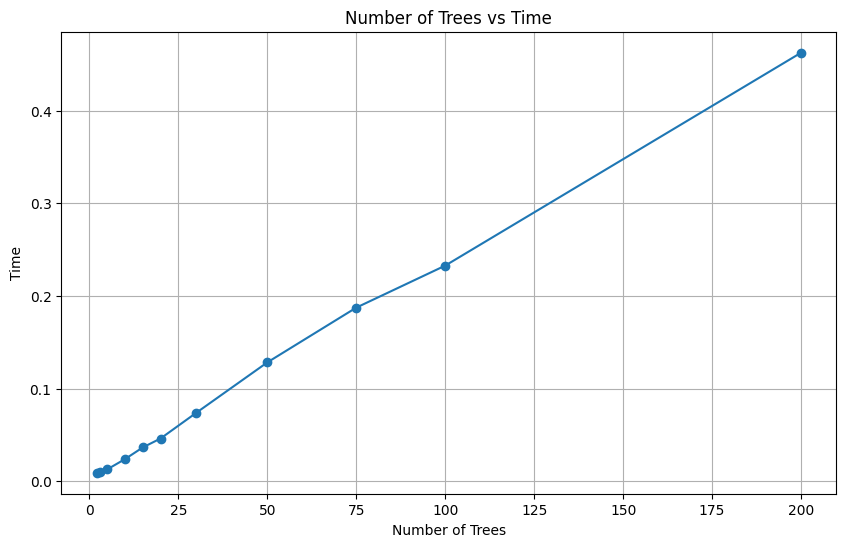

In [3358]:
# Plot number of trees vs MSE
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, time_list, marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Time')
plt.title('Number of Trees vs Time')
plt.grid(True)
plt.show()


### Analysis

Analyzing the mistakes of machine learning models like Random Forest, AdaBoost, and Gradient Boosting involves understanding where these models tend to perform poorly.

1. Bias and Variance: High bias can cause the model to miss relevant relations between features and target outputs (underfitting), while high variance can cause the model to model the random noise in the training data (overfitting). Random Forests generally have low bias and high variance, while boosting methods can adjust the bias-variance trade-off based on the number of weak learners (i.e., depth of trees, number of trees).

2. Outliers: All three models can be sensitive to outliers. Outliers can affect the split of trees in Random Forest and the calculation of residuals in boosting methods.

3. Noisy Data: Random Forest is quite robust to noisy data, but AdaBoost can overfit to noisy data or outliers. Gradient Boosting can also overfit if the learning rate is too high or the number of estimators is too large.

4. Feature Importance: If some features are dominating, the models may rely too heavily on these features, leading to poor generalization. You can inspect the feature importance of these models to see if this is the case.